# linear regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\gold_price_data.csv")
df

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100
...,...,...,...,...,...,...,...
5210,2025-08-06,310.500000,310.500000,311.239990,309.839996,310.320007,7418200
5211,2025-08-07,313.119995,313.119995,313.140015,310.700012,311.720001,10891500
5212,2025-08-08,313.049988,313.049988,313.529999,311.000000,312.350006,19886800
5213,2025-08-11,308.549988,308.549988,309.660004,307.630005,308.619995,10326700


In [4]:
df.shape

(5215, 7)

In [5]:
df.head(5)

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100


In [6]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [7]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,open,high,low,close,adj_close,volume
count,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5.215000e+03
mean,131.940968,131.940968,132.570993,131.256556,131.939183,9.423568e+06
std,51.291094,51.291094,51.459284,51.073175,51.282084,6.645282e+06
min,41.259998,41.259998,41.360001,41.020000,41.029999,3.193000e+05
25%,104.730000,104.730000,105.355000,104.160000,104.754997,5.305150e+06
50%,124.400002,124.400002,124.870003,123.980003,124.459999,7.818800e+06
75%,164.779999,164.779999,165.489998,164.004997,164.544998,1.154915e+07
max,316.290009,316.290009,317.630005,315.040009,317.489990,9.380420e+07


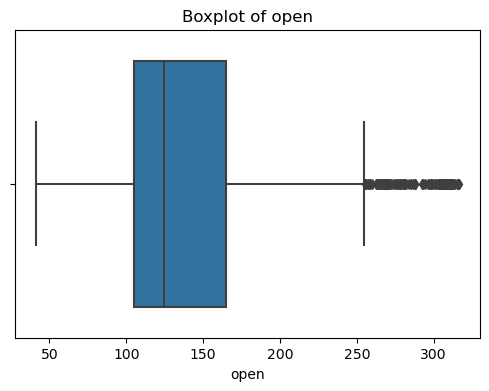

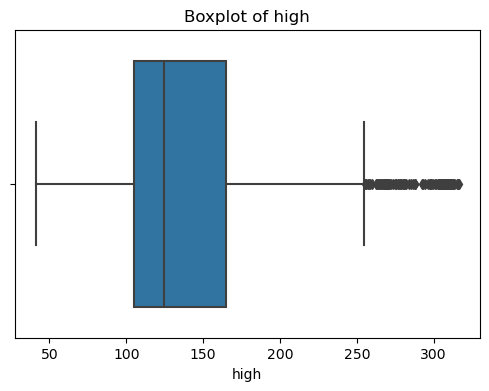

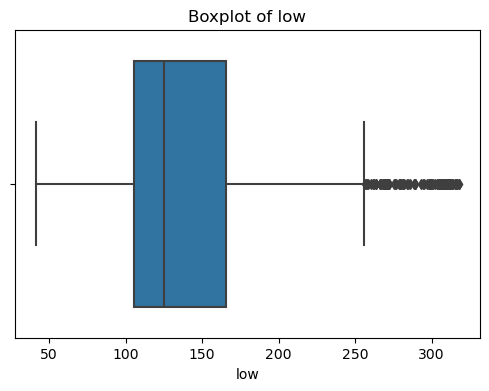

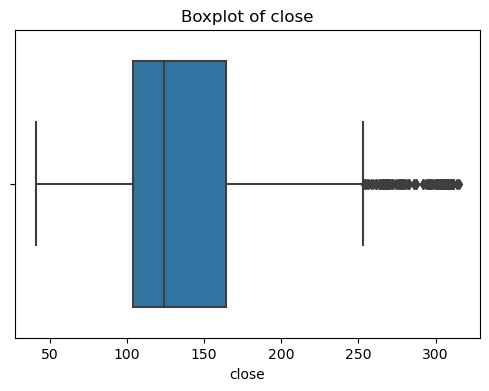

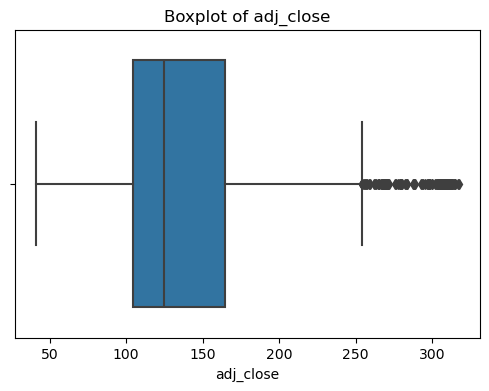

In [12]:
features = ["open", "high", "low", "close", "adj_close"]
for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

               open      high       low     close  adj_close
open       1.000000  1.000000  0.999911  0.999920   0.999823
high       1.000000  1.000000  0.999911  0.999920   0.999823
low        0.999911  0.999911  1.000000  0.999864   0.999919
close      0.999920  0.999920  0.999864  1.000000   0.999894
adj_close  0.999823  0.999823  0.999919  0.999894   1.000000


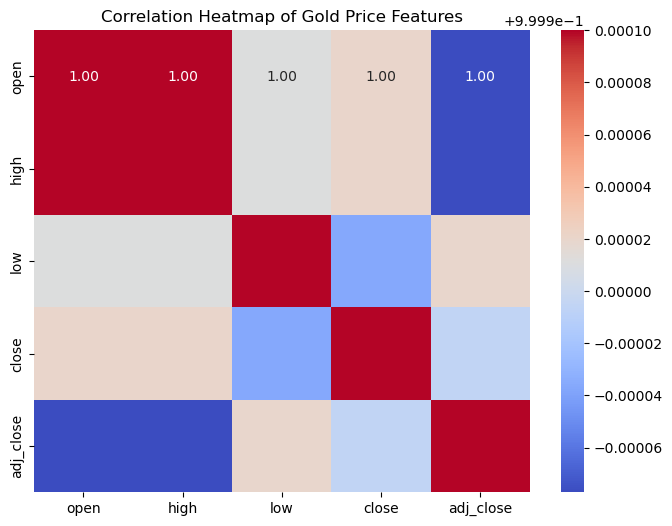

In [13]:
corr_matrix = df[features].corr()
print(corr_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Gold Price Features")
plt.show()


In [14]:
X = df[["open", "high", "low", "close","adj_close"]]
y = df["volume"]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [20]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2score)



Model Performance:
MSE: 21484658418600.266
RMSE: 4635154.627258972
R2 Score: 0.5242878146936429


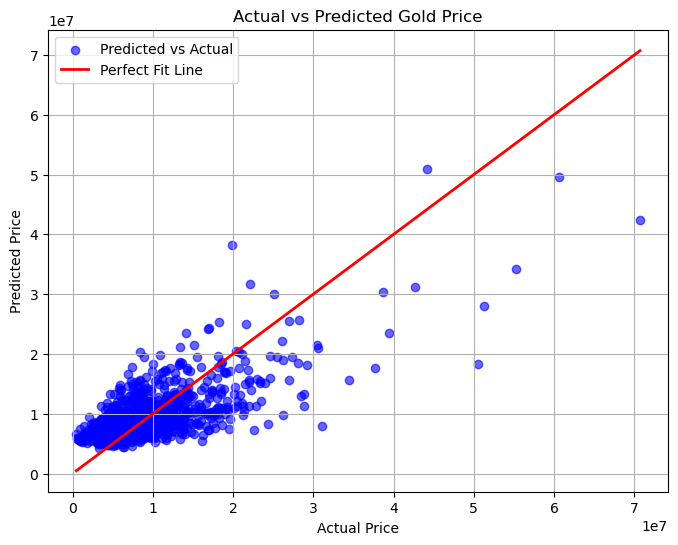

In [23]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Perfect Fit Line")

plt.title("Actual vs Predicted Gold Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.show()
